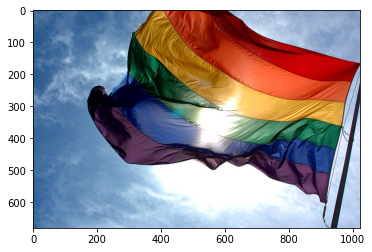

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image= cv2.imread("rainbow_flag.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

(0.0, 681.0)

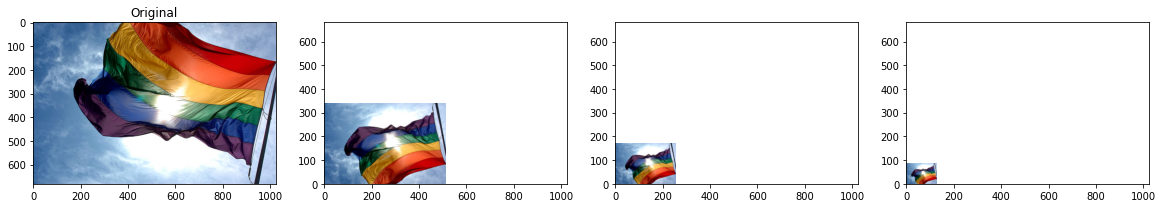

In [2]:
level_1=cv2.pyrDown(image)
level_2 = cv2.pyrDown(level_1)
level_3 = cv2.pyrDown(level_2)
#Display the images
f,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize =(20,10))
ax1.set_title("Original")
ax1.imshow(image)
#resolution is also reduced with size
ax2.imshow(level_1)
ax2.set_xlim([0,image.shape[1]])
ax2.set_ylim([0,image.shape[0]])

ax3.imshow(level_2)
ax3.set_xlim([0,image.shape[1]])
ax3.set_ylim([0,image.shape[0]])

ax4.imshow(level_3)
ax4.set_xlim([0,image.shape[1]])
ax4.set_ylim([0,image.shape[0]])


In [3]:
import cv2
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[20,10]

image =cv2.imread("face.jpeg")
training_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

training_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

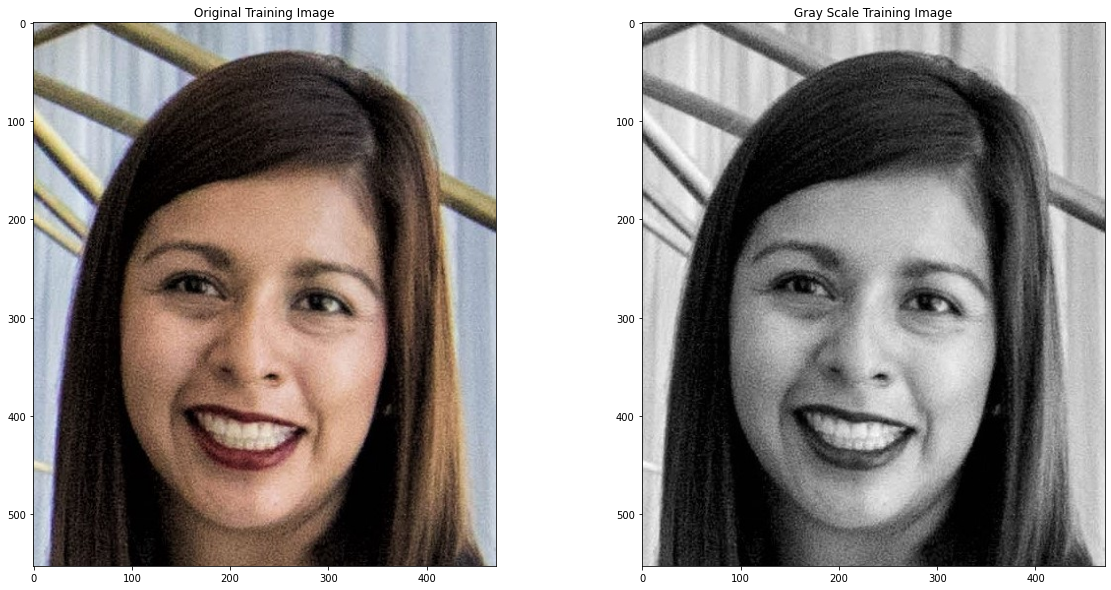

In [4]:
plt.subplot(121)
plt.title("Original Training Image")
plt.imshow(training_image)

plt.subplot(122)
plt.title("Gray Scale Training Image")
plt.imshow(training_gray,cmap="gray")

plt.show()


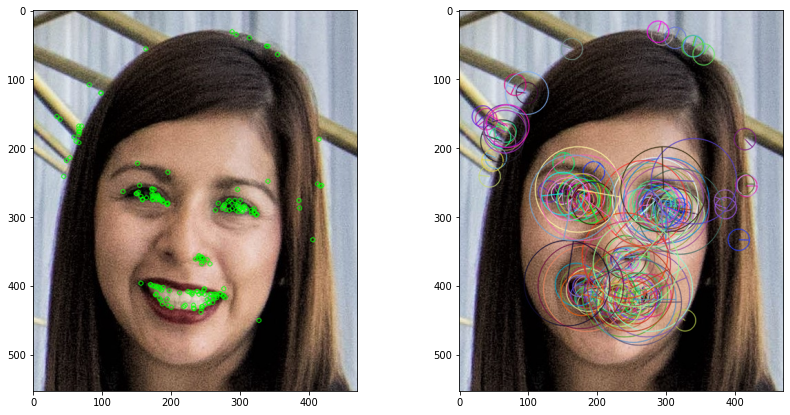

In [5]:
import copy
orb = cv2.ORB_create()
plt.rcParams['figure.figsize']=[14,7]
orb = cv2.ORB_create(200,2.0)
keypoints,descriptor = orb.detectAndCompute(training_gray,None)
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

cv2.drawKeypoints(training_image,keypoints,keyp_without_size,color= (0,255,0))
cv2.drawKeypoints(training_image,keypoints,keyp_with_size,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121)
plt.imshow(keyp_without_size)
plt.subplot(122)
plt.imshow(keyp_with_size)
#The image is going to deteriorate on the basis of scale factor
#edge threshold is thevalue of border where features are not detected
#score type- harris score or fast score,fast score gives lesser stable keypoint but is faster then harris,
#harris is the corner edge detction algo and rank features/.,mnb  


FEATURE MATCHING


Number of KP in training img: 821
Number of KP in Query img: 821
Number of matching points 821


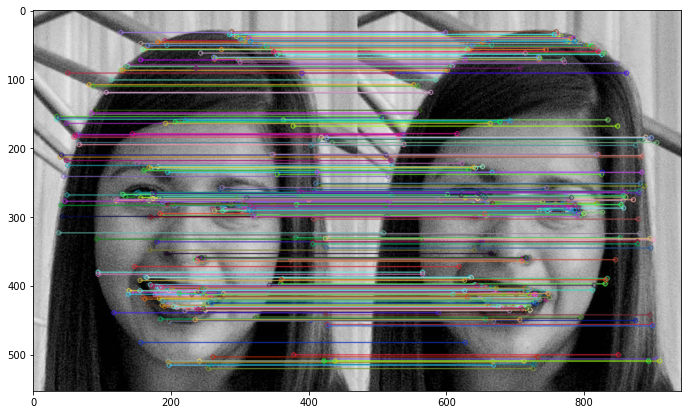

In [6]:
image1 = cv2.imread('face.jpeg')
image2 = cv2.imread("face.jpeg")
training_image = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)



training_gray = cv2.cvtColor(training_image,cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image,cv2.COLOR_BGR2GRAY)

orb=cv2.ORB_create(1000,2.0)

keypoints_train, descriptors_train = orb.detectAndCompute(training_gray,None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray,None)

bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(descriptors_train,descriptors_query)

matches= sorted(matches,key=lambda x: x.distance) 

result = cv2.drawMatches(training_gray,keypoints_train,query_gray,keypoints_query,matches[:300],query_gray,flags=2)
plt.imshow(result)

print("Number of KP in training img:", len(keypoints_train))
print("Number of KP in Query img:", len(keypoints_query))

print("Number of matching points",len(matches))


ORB MAin Properties
1)Scale Invariance

Number of KP in training img: 821
Number of KP in Query img: 65
Number of matching points 58


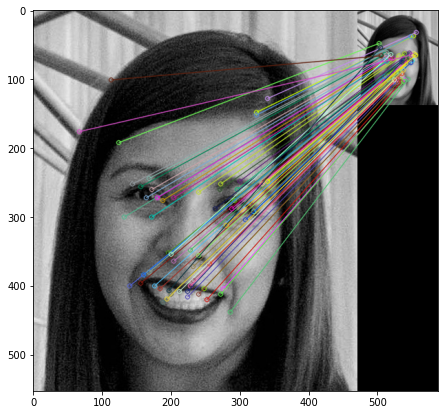

In [7]:
image1 = cv2.imread('face.jpeg')
image2 = cv2.imread("faceQS.png")
training_image = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)



training_gray = cv2.cvtColor(training_image,cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image,cv2.COLOR_BGR2GRAY)

orb=cv2.ORB_create(1000,2.0)

keypoints_train, descriptors_train = orb.detectAndCompute(training_gray,None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray,None)

bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(descriptors_train,descriptors_query)

matches= sorted(matches,key=lambda x: x.distance) 

result = cv2.drawMatches(training_gray,keypoints_train,query_gray,keypoints_query,matches[:300],query_gray,flags=2)
plt.imshow(result)

print("Number of KP in training img:", len(keypoints_train))
print("Number of KP in Query img:", len(keypoints_query))

print("Number of matching points",len(matches))

Object Detection


Text(0.5, 1.0, 'Query_Image')

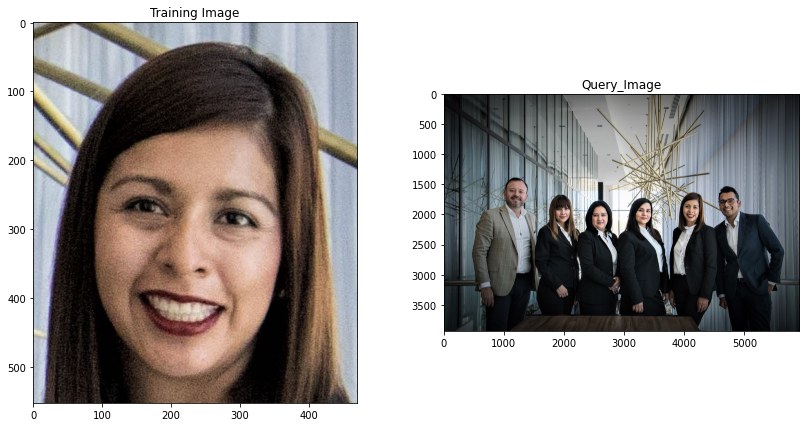

In [15]:
image1=cv2.imread('face.jpeg')
image2 = cv2.imread('Team.jpeg')

training_image = cv2.cvtColor(image1,cv2.COLOR_RGB2BGR)
query_image = cv2.cvtColor(image2,cv2.COLOR_RGB2BGR)

plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query_Image')

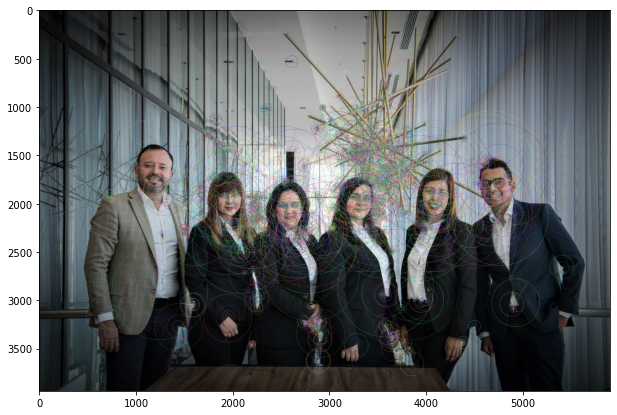

In [19]:
training_gray=cv2.cvtColor(training_image,cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image,cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(5000,2.0)

keypoints_train,descriptors_train = orb.detectAndCompute(training_gray,None)
keypoints_query,descriptors_query = orb.detectAndCompute(query_gray,None)

query_img_keyp = copy.copy(query_image)
cv2.drawKeypoints(query_image,keypoints_query,query_img_keyp,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(query_img_keyp)

Number of KP in training img: 2488
Number of KP in Query img: 4941
Number of matching points 672


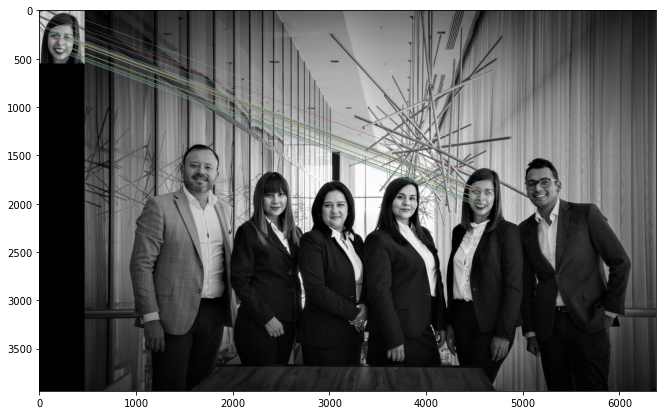

In [21]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(descriptors_train,descriptors_query)

matches= sorted(matches,key=lambda x: x.distance) 

result = cv2.drawMatches(training_gray,keypoints_train,query_gray,keypoints_query,matches[:85],query_gray,flags=2)
plt.imshow(result)

print("Number of KP in training img:", len(keypoints_train))
print("Number of KP in Query img:", len(keypoints_query))

print("Number of matching points",len(matches))